# Amaan Ahmad Khan Task1 #GRIPJUNE

Problem Statement- 1)Predict the percentage of an student based on the no. of study hours. 2)What will be predicted score if a student studies for 9.25 hrs/ day?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

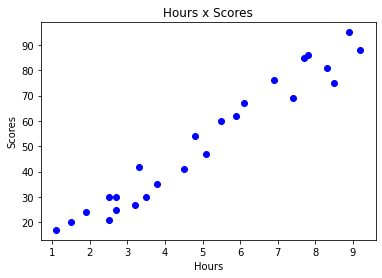

In [5]:
# now draw the regression plot 
plt.scatter(df.Hours, df.Scores,  color='blue')
plt.title("Hours x Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

As we can see the graph is pretty much linear


In [6]:
# Splitting the model by creating train test split using numpy rather than sklearn

partition = np.random.rand(len(df)) < 0.8
train = df[partition]
test = df[~partition]

In [7]:
# Training the model
from sklearn import linear_model
regr=linear_model.LinearRegression()
train_x = np.asanyarray(train[['Hours']])
train_y = np.asanyarray(train[['Scores']])
regr.fit(train_x,train_y)

# lets print the regression cofficients 
print ('Theta0: ', regr.coef_)
print ('Theta1: ',regr.intercept_)


Theta0:  [[9.81900157]]
Theta1:  [1.30567172]


Text(0, 0.5, 'Scores')

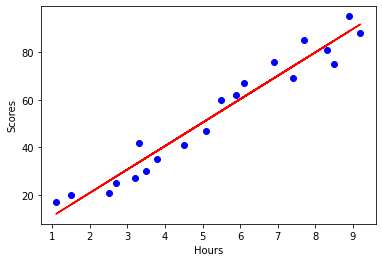

In [8]:
# Lets plot the fit line by using the coefficients
plt.scatter(train.Hours,train.Scores,color='blue')
plt.plot(train_x,regr.coef_[0][0]*train_x+regr.intercept_[0],"-r")
plt.xlabel('Hours')
plt.ylabel('Scores')

# We have 3 method to train and test split for our data
# 1) Train with the entire data and test on a sample of the same data
# 2) Train Test Split(already done)
# 3) K fold Cross Validation

In [9]:
#1)Train with the entire data and test on a sample of the same data
partition2=np.random.rand(len(df))<0.2
train2=df
test2=df[partition2]

In [10]:
train_x_2 = np.asanyarray(train2[['Hours']])
train_y_2 = np.asanyarray(train2[['Scores']])
regr.fit(train_x_2,train_y_2)
# printing the coefficients
print("Train with the entire data and test on a sample of the same data")
print('Theta0: ',regr.coef_)
print('Theta1: ',regr.intercept_)

Train with the entire data and test on a sample of the same data
Theta0:  [[9.77580339]]
Theta1:  [2.48367341]


In [11]:
# 2) Train test split using sklearn
from sklearn.model_selection import train_test_split
X=df.drop('Scores',axis=1)
y=df.Scores
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
regr.fit(X_train,y_train)
print("Training the model using Train Test Split")
print('Theta0: ',regr.coef_)
print('Theta1: ',regr.intercept_)
regr.score(X_test,y_test)

Training the model using Train Test Split
Theta0:  [9.94167834]
Theta1:  1.9322042531516601


0.9367661043365056

In [12]:
# K fold cross validation
from sklearn.model_selection import KFold

In [13]:
def get_score(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

In [14]:
get_score(regr,X_train,X_test,y_train,y_test)

0.9367661043365056

In [15]:
kf=KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [16]:
# Here i am doing K fold cross validation for Linear regression by using our get_score function
values=[] 
for train_index,test_index in kf.split(X):
    X_train,X_test,y_train,y_test=X.iloc[train_index],X.iloc[test_index],y.iloc[train_index],y.iloc[test_index]
    values.append(get_score(regr,X_train,X_test,y_train,y_test))

In [17]:
# Here you can see we will be returning 10 values by taking the average we will get the performance of our model
values

[0.9005964808797998, 0.9529032607905507, 0.9342276909497311]

In [18]:
avg_of_values=sum(values)/len(values)
avg_of_values

0.9292424775400271

# Here you can see the model is a good fit

Lets start predicting

In [27]:
X=df.drop('Scores',axis=1)
y=df.Scores
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [28]:
y_hat=regr.predict(X_test)

In [29]:
y_hat

array([16.68364614, 33.05423906, 73.49923333, 26.31340668, 59.05459252])

In [30]:
y_test

5     20
2     27
19    69
16    30
11    62
Name: Scores, dtype: int64

# Evaluation by R score

In [23]:
from sklearn import metrics
r2_score=metrics.r2_score(y_test,y_hat)
r2_score

0.9544914649518782

# R score value: 0.9544914649518782

# As we can see the R score is close to 1 that means Our model performs Really good :)

Testing our data according to the question 'What will be predicted score if a student studies for 9.25 hrs/ day?'

In [35]:
hours = 9.25
prediction = regr.predict([[hours]])
print(f"If a student study for {hours} hours, he/she will likely to score: {int(prediction)} marks.")

If a student study for 9.25 hours, he/she will likely to score: 91 marks.


# With that, our Task1 is Successfully completed